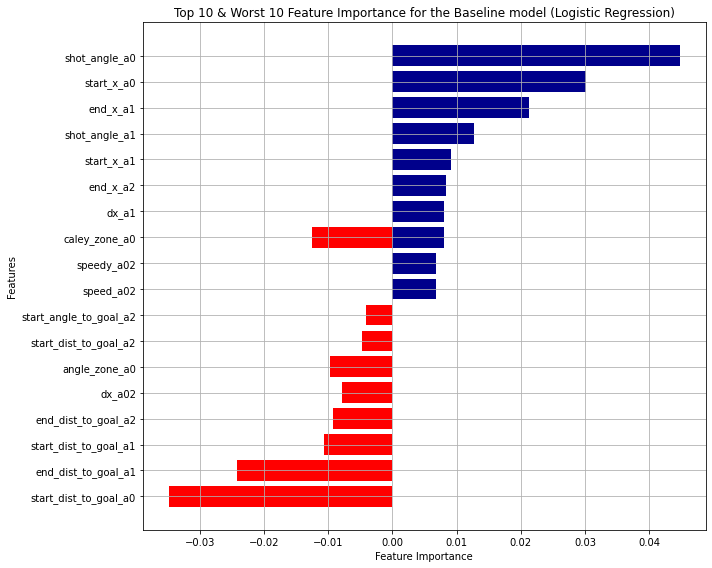

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("feature_importance_l2.csv", header=None, names=["feature", "importance"])

df['importance'] = pd.to_numeric(df['importance'], errors='coerce')

df = df.dropna()

df['feature'] = df['feature'].astype(str)

df = df.sort_values(by="importance", ascending=False)

top_10 = df.head(10)
worst_10 = df.tail(10)

combined = pd.concat([top_10, worst_10])

colors = ['darkblue' if x >= 0 else 'red' for x in combined['importance']]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(combined['feature'], combined['importance'], color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 & Worst 10 Feature Importance for the Baseline model (Logistic Regression)')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.grid(True)
plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Map met CSV-bestanden
folder = "Chi_square_resultaten"
files = glob.glob(os.path.join(folder, "feature_importance_chi_square_test_*.csv"))

dataframes = []
for file in files:
    test_name = os.path.basename(file).split(".")[0]  # Testnaam uit bestandsnaam halen
    df = pd.read_csv(file, header=None, names=["feature", "importance"])
    df['importance'] = pd.to_numeric(df['importance'], errors='coerce')  # Converteer naar numeriek
    df = df.dropna()  # Verwijder NaN-waarden
    df['test'] = test_name  # Voeg testnaam toe
    dataframes.append(df)

# Combineer alle dataframes
combined_df = pd.concat(dataframes)

# Pivot de data om een tabel te maken
pivot_df = combined_df.pivot_table(index="feature", columns="test", values="importance", aggfunc="mean")

# Selecteer top 20 features (gemiddelde importance over alle tests)
top_features = pivot_df.mean(axis=1).sort_values(ascending=False).head(20).index
pivot_df = pivot_df.loc[top_features]

# Zet pivot-table om naar een numpy-array voor plotting
data = pivot_df.to_numpy()

combined_df.head()

,feature,importance,test
1,start_dist_to_goal_a0,-17.142452,feature_importance_chi_square_test_1
2,bodypart_id_a1,-1.095034,feature_importance_chi_square_test_1
3,angle_zone_a0,-0.277182,feature_importance_chi_square_test_1
4,angle_zone_a0,-0.241524,feature_importance_chi_square_test_1
5,caley_zone_a1,-0.204223,feature_importance_chi_square_test_1


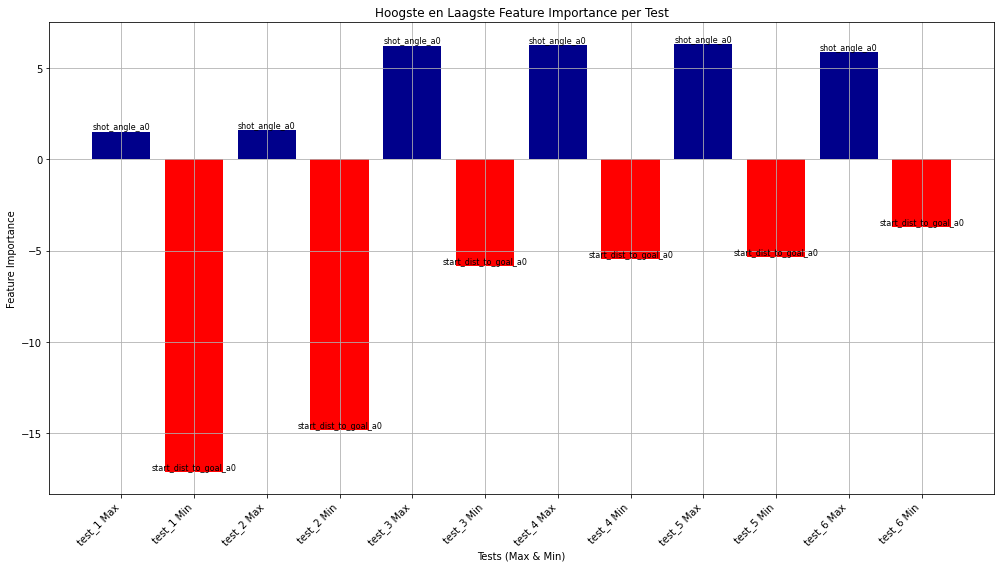

In [40]:
# Verkort de testnaam
summary = []
for test_name, group in combined_df.groupby('test'):
    short_test_name = test_name.replace("feature_importance_chi_square_", "")  # Verkort testnaam
    max_feature = group.loc[group['importance'].idxmax()]
    min_feature = group.loc[group['importance'].idxmin()]
    summary.append({'test': short_test_name, 'feature': max_feature['feature'], 'importance': max_feature['importance'], 'type': 'Max'})
    summary.append({'test': short_test_name, 'feature': min_feature['feature'], 'importance': min_feature['importance'], 'type': 'Min'})

summary_df = pd.DataFrame(summary)

# Barplot maken
plt.figure(figsize=(14, 8))
colors = {"Max": "darkblue", "Min": "red"}

x_ticks = []  # Voor aangepaste x-as labels
for i, row in summary_df.iterrows():
    label = f"{row['test']} {row['type']}"  # Simpel label, zoals test_1 Max
    x_ticks.append(label)
    plt.bar(label, row['importance'], color=colors[row['type']])
    # Annotatie toevoegen
    plt.text(label, row['importance'] + 0.005, 
             row['feature'], ha='center', va='bottom', fontsize=8)

# Styling
plt.xlabel('Tests (Max & Min)')
plt.ylabel('Feature Importance')
plt.title('Highest and Lowest Feature Importance Score for each Chi Square Test')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Map met CSV-bestanden
folder = "FFS_resultaten"
files = glob.glob(os.path.join(folder, "feature_importance_forward_feature_selection_neg_brier_*.csv"))

dataframes = []
for file in files:
    test_name = os.path.basename(file).split(".")[0]  # Testnaam uit bestandsnaam halen
    df = pd.read_csv(file, header=None, names=["feature", "importance"])
    df['importance'] = pd.to_numeric(df['importance'], errors='coerce')  # Converteer naar numeriek
    df = df.dropna()  # Verwijder NaN-waarden
    df['test'] = test_name  # Voeg testnaam toe
    dataframes.append(df)

# Combineer alle dataframes
combined_df = pd.concat(dataframes)

# Pivot de data om een tabel te maken
pivot_df = combined_df.pivot_table(index="feature", columns="test", values="importance", aggfunc="mean")

# Selecteer top 20 features (gemiddelde importance over alle tests)
top_features = pivot_df.mean(axis=1).sort_values(ascending=False).head(20).index
pivot_df = pivot_df.loc[top_features]

# Zet pivot-table om naar een numpy-array voor plotting
data = pivot_df.to_numpy()

combined_df.head()

,feature,importance,test
1,type_id_a1,-5.814304,feature_importance_forward_feature_selection_n...
2,result_id_a2,-4.689578,feature_importance_forward_feature_selection_n...
3,type_id_a1,-1.460220,feature_importance_forward_feature_selection_n...
4,angle_zone_a0,-1.354759,feature_importance_forward_feature_selection_n...
5,type_id_a0,-1.341602,feature_importance_forward_feature_selection_n...


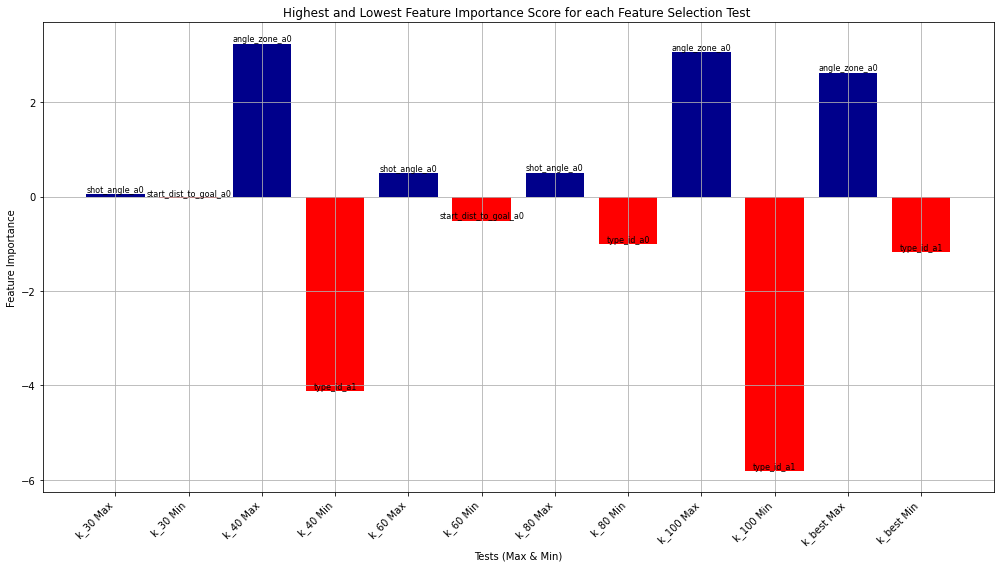

In [ ]:
# Verkort de testnaam
summary = []
for test_name, group in combined_df.groupby('test'):
    short_test_name = test_name.replace("feature_importance_forward_feature_selection_neg_brier_", "k_")  # Verkort testnaam
    max_feature = group.loc[group['importance'].idxmax()]
    min_feature = group.loc[group['importance'].idxmin()]
    summary.append({'test': short_test_name, 'feature': max_feature['feature'], 'importance': max_feature['importance'], 'type': 'Max'})
    summary.append({'test': short_test_name, 'feature': min_feature['feature'], 'importance': min_feature['importance'], 'type': 'Min'})

summary_df = pd.DataFrame(summary)

# Extracteer nummer uit testnaam en vervang NaN door 999999
summary_df['test_number'] = summary_df['test'].str.extract(r'(\d+)')  # Extract nummer als string
summary_df['test_number'] = summary_df['test_number'].fillna('999999').astype(int)  # Vervang NaN door 999999 en converteer naar integer

# Sorteer op numerieke waarde van het testnummer
summary_df = summary_df.sort_values(by='test_number')

# Barplot maken
plt.figure(figsize=(14, 8))
colors = {"Max": "darkblue", "Min": "red"}

x_ticks = []  # Voor aangepaste x-as labels
for i, row in summary_df.iterrows():
    label = f"{row['test']} {row['type']}"  # Simpel label, zoals test_1 Max
    x_ticks.append(label)
    plt.bar(label, row['importance'], color=colors[row['type']])
    # Annotatie toevoegen
    plt.text(label, row['importance'] + 0.005, 
             row['feature'], ha='center', va='bottom', fontsize=8)

# Styling
plt.xlabel('Tests (Max & Min)')
plt.ylabel('Feature Importance')
plt.title('Highest and Lowest Feature Importance Score for each Feature Selection Test')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Map met CSV-bestanden
folder = "Cnn_resultaten"
files = glob.glob(os.path.join(folder, "feature_importance_CNN_test_*.csv"))

dataframes = []
for file in files:
    test_name = os.path.basename(file).split(".")[0]  # Testnaam uit bestandsnaam halen
    df = pd.read_csv(file, header=None, names=["feature", "importance"])
    df['importance'] = pd.to_numeric(df['importance'], errors='coerce')  # Converteer naar numeriek
    df = df.dropna()  # Verwijder NaN-waarden
    df['test'] = test_name  # Voeg testnaam toe
    dataframes.append(df)

# Combineer alle dataframes
combined_df = pd.concat(dataframes)

# Pivot de data om een tabel te maken
pivot_df = combined_df.pivot_table(index="feature", columns="test", values="importance", aggfunc="mean")

# Selecteer top 20 features (gemiddelde importance over alle tests)
top_features = pivot_df.mean(axis=1).sort_values(ascending=False).head(20).index
pivot_df = pivot_df.loc[top_features]

# Zet pivot-table om naar een numpy-array voor plotting
data = pivot_df.to_numpy()

combined_df.head()

,feature,importance,test
1,start_dist_to_goal_a0,-1.108253,feature_importance_CNN_test_1
2,caley_zone_a0,-0.669676,feature_importance_CNN_test_1
3,type_id_a0,-0.612581,feature_importance_CNN_test_1
4,angle_zone_a0,-0.570174,feature_importance_CNN_test_1
5,bodypart_id_a0,-0.566733,feature_importance_CNN_test_1


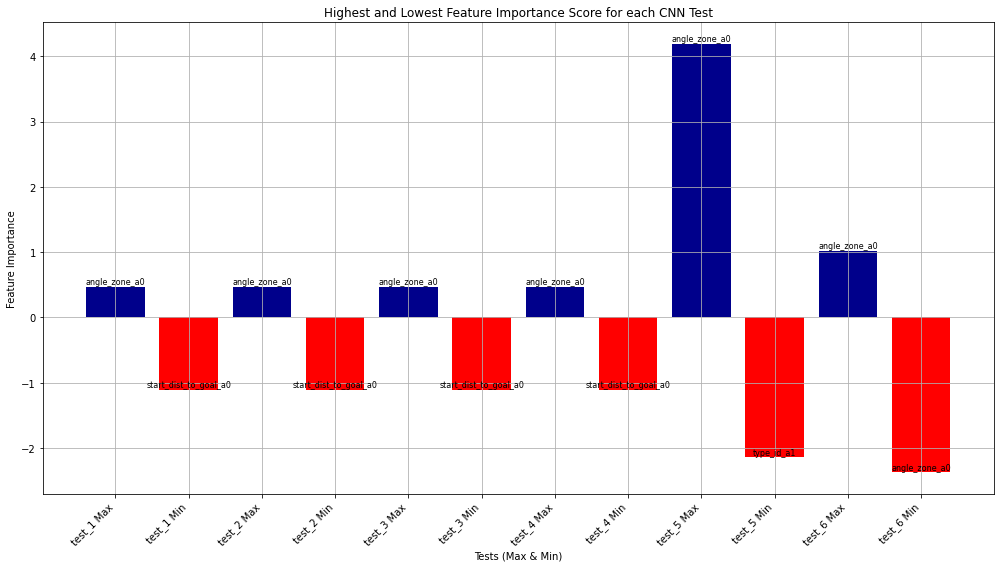

In [54]:
# Verkort de testnaam
summary = []
for test_name, group in combined_df.groupby('test'):
    short_test_name = test_name.replace("feature_importance_CNN_", "")  # Verkort testnaam
    max_feature = group.loc[group['importance'].idxmax()]
    min_feature = group.loc[group['importance'].idxmin()]
    summary.append({'test': short_test_name, 'feature': max_feature['feature'], 'importance': max_feature['importance'], 'type': 'Max'})
    summary.append({'test': short_test_name, 'feature': min_feature['feature'], 'importance': min_feature['importance'], 'type': 'Min'})

summary_df = pd.DataFrame(summary)

# Barplot maken
plt.figure(figsize=(14, 8))
colors = {"Max": "darkblue", "Min": "red"}

x_ticks = []  # Voor aangepaste x-as labels
for i, row in summary_df.iterrows():
    label = f"{row['test']} {row['type']}"  # Simpel label, zoals test_1 Max
    x_ticks.append(label)
    plt.bar(label, row['importance'], color=colors[row['type']])
    # Annotatie toevoegen
    plt.text(label, row['importance'] + 0.005, 
             row['feature'], ha='center', va='bottom', fontsize=8)

# Styling
plt.xlabel('Tests (Max & Min)')
plt.ylabel('Feature Importance')
plt.title('Highest and Lowest Feature Importance Score for each CNN Test')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Map met CSV-bestanden
folder = "RNN_test_resultaten"
files = glob.glob(os.path.join(folder, "feature_importance_rnn_MODEL-*.csv"))

dataframes = []
for file in files:
    test_name = os.path.basename(file).split(".")[0]  
    df = pd.read_csv(file, header=None, names=["feature", "importance"])
    df['importance'] = pd.to_numeric(df['importance'], errors='coerce')  
    df = df.dropna() 
    df['test'] = test_name  
    dataframes.append(df)

combined_df = pd.concat(dataframes)

pivot_df = combined_df.pivot_table(index="feature", columns="test", values="importance", aggfunc="mean")

top_features = pivot_df.mean(axis=1).sort_values(ascending=False).head(20).index
pivot_df = pivot_df.loc[top_features]

data = pivot_df.to_numpy()

combined_df.head()

,feature,importance,test
1,type_id_a0,-1.796287,feature_importance_rnn_MODEL-1
2,type_id_a1,-1.500033,feature_importance_rnn_MODEL-1
3,caley_zone_a0,-1.414502,feature_importance_rnn_MODEL-1
4,caley_zone_a0,-1.154771,feature_importance_rnn_MODEL-1
5,caley_zone_a0,-1.111394,feature_importance_rnn_MODEL-1


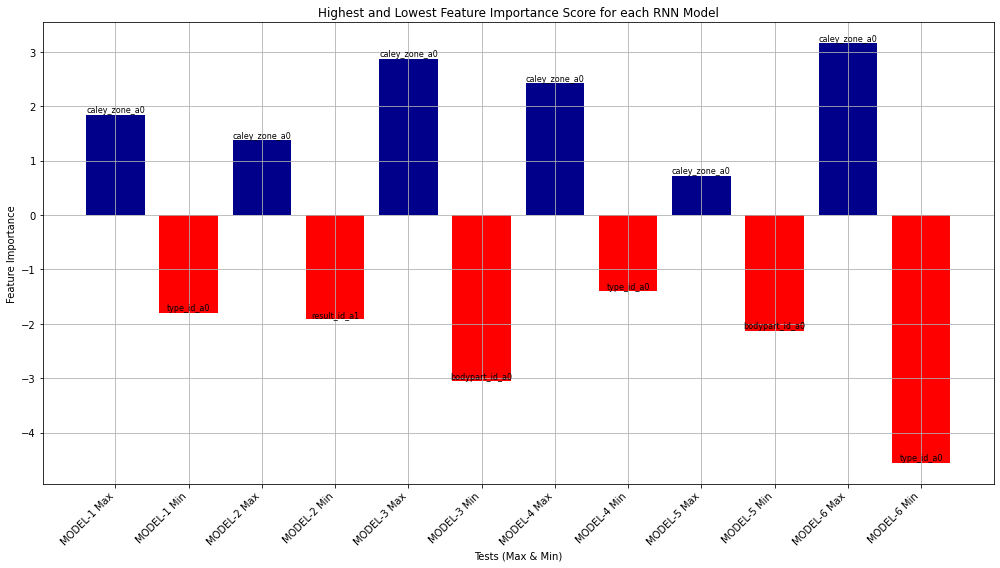

In [2]:
summary = []
for test_name, group in combined_df.groupby('test'):
    short_test_name = test_name.replace("feature_importance_rnn_", "")  
    max_feature = group.loc[group['importance'].idxmax()]
    min_feature = group.loc[group['importance'].idxmin()]
    summary.append({'test': short_test_name, 'feature': max_feature['feature'], 'importance': max_feature['importance'], 'type': 'Max'})
    summary.append({'test': short_test_name, 'feature': min_feature['feature'], 'importance': min_feature['importance'], 'type': 'Min'})

summary_df = pd.DataFrame(summary)

plt.figure(figsize=(14, 8))
colors = {"Max": "darkblue", "Min": "red"}

x_ticks = []  
for i, row in summary_df.iterrows():
    label = f"{row['test']} {row['type']}" 
    x_ticks.append(label)
    plt.bar(label, row['importance'], color=colors[row['type']])
 
    plt.text(label, row['importance'] + 0.005, 
             row['feature'], ha='center', va='bottom', fontsize=8)

plt.xlabel('Tests (Max & Min)')
plt.ylabel('Feature Importance')
plt.title('Highest and Lowest Feature Importance Score for each RNN Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()
